In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.image as mpimg                           # Image loading and manipulation library
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121,  VGG16, ResNet50

In [3]:
data_train_path = '/content/drive/MyDrive/dataset/training/train'
data_test_path = '/content/drive/MyDrive/dataset/training/test'
data_val_path = '/content/drive/MyDrive/dataset/training/val'

In [4]:
img_width = 256
img_height =256

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 14013 files belonging to 10 classes.


In [6]:
data_leaf = data_train.class_names
data_leaf

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 3000 files belonging to 10 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 2999 files belonging to 10 classes.


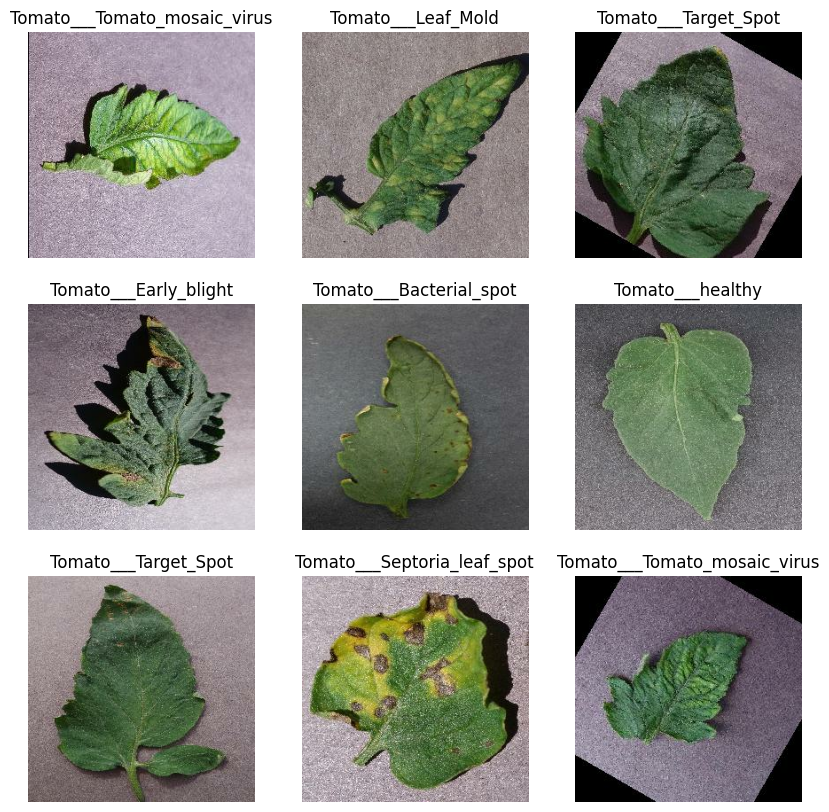

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_leaf[labels[i]])
        plt.axis('off')

In [9]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization
# Various types of layers for building neural networks
from tensorflow.keras.applications import ResNet50

In [10]:
# Load the ResNet50 base model with ImageNet weights, exclude the top layers
conv_base2 = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3), pooling='avg')

# Freeze the base model layers
conv_base2.trainable = False

model2 = Sequential()
model2.add(conv_base2)  # Add ResNet50 base model
model2.add(BatchNormalization())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.40))
model2.add(BatchNormalization())
model2.add(Dense(120, activation='relu'))  # Adjust this layer if needed
model2.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

# Compile the model
model2.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])




94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
pip install tensorflow

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 277s 602ms/step - accuracy: 0.7220 - loss: 0.8318 - val_accuracy: 0.9293 - val_loss: 0.2058
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 63s 145ms/step - accuracy: 0.9080 - loss: 0.2718 - val_accuracy: 0.9457 - val_loss: 0.1565
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 61s 140ms/step - accuracy: 0.9289 - loss: 0.2009 - val_accuracy: 0.9567 - val_loss: 0.1438
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 83s 141ms/step - accuracy: 0.9473 - loss: 0.1452 - val_accuracy: 0.9603 - val_loss: 0.1213
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 92s 164ms/step - accuracy: 0.9508 - loss: 0.1317 - val_accuracy: 0.9547 - val_loss: 0.1344
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 73s 144ms/step - accuracy: 0.9589 - loss: 0.1209 - val_accuracy: 0.9590 - val_loss: 0.1293
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 82s 143ms/step - accuracy: 0.9650 - loss: 0.0953 - val_accuracy: 0.9607 - val_loss: 0.1127
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - accuracy: 0.9633 - loss: 

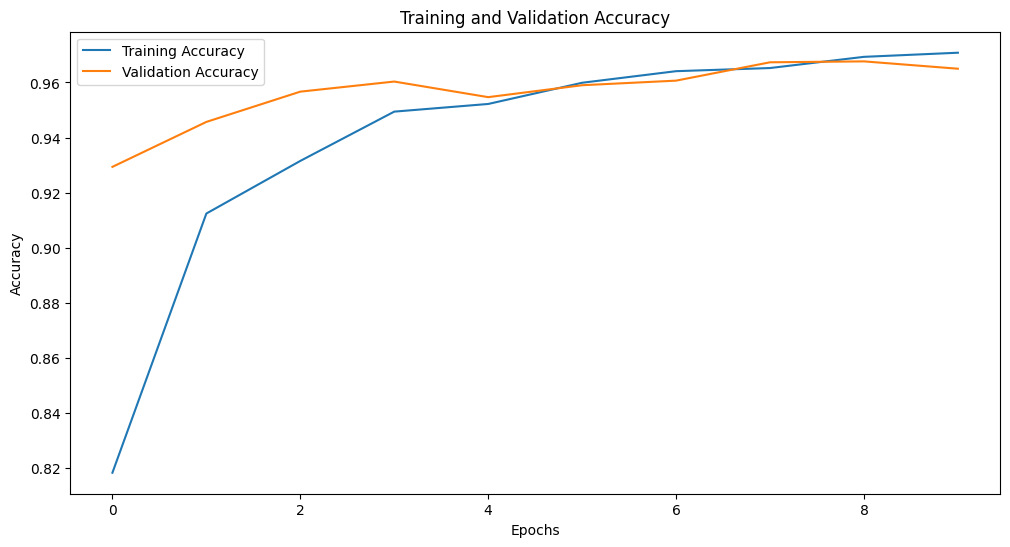

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history2 = model2.fit(
    data_train,
    epochs=10,  # Adjust as needed
    validation_data=data_val,
    callbacks=[early_stopping]
)
model2.save('/content/drive/MyDrive/dataset/resnet50_model.keras')

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [12]:
import tensorflow as tf

model_path = r'/content/drive/MyDrive/dataset/resnet50_model.h5'  # Update with your model path

try:
    model = tf.keras.models.load_model(model_path)
    model.summary()  # Prints out the model architecture
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

Error loading model: Invalid dtype: tuple


In [ ]:
# After the model training, calculate overall epoch results
train_accuracies = history2.history['accuracy']
val_accuracies = history2.history['val_accuracy']

# Calculate the average accuracy over all epochs
average_train_accuracy = np.mean(train_accuracies)
average_val_accuracy = np.mean(val_accuracies)

print(f"Average Training Accuracy over {len(train_accuracies)} epochs: {average_train_accuracy:.4f}")
print(f"Average Validation Accuracy over {len(val_accuracies)} epochs: {average_val_accuracy:.4f}")

Average Training Accuracy over 10 epochs: 0.9393
Average Validation Accuracy over 10 epochs: 0.9566


In [ ]:
# Directly evaluate the model
test_loss, test_accuracy = model2.evaluate(data_test)

# Print the model name and test accuracy
print(f'Test Accuracy: {test_accuracy:.4f}')
#print(f'Model: {model_name} - Test Accuracy: {test_accuracy:.4f}')


94/94 ━━━━━━━━━━━━━━━━━━━━ 958s 10s/step - accuracy: 0.9725 - loss: 0.0913
Test Accuracy: 0.9700


94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step


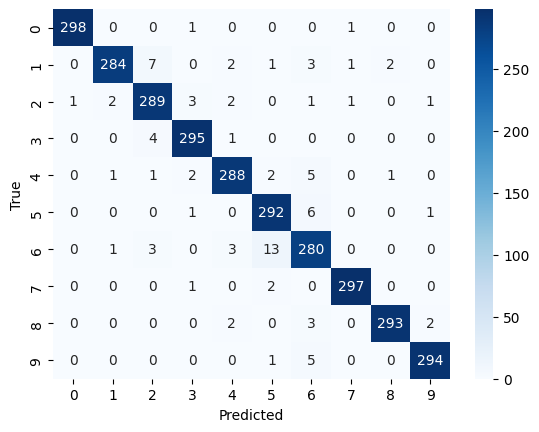

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       1.00      0.99      0.99       300
                        Tomato___Early_blight       0.99      0.95      0.97       300
                         Tomato___Late_blight       0.95      0.96      0.96       300
                           Tomato___Leaf_Mold       0.97      0.98      0.98       300
                  Tomato___Septoria_leaf_spot       0.97      0.96      0.96       300
Tomato___Spider_mites Two-spotted_spider_mite       0.94      0.97      0.96       300
                         Tomato___Target_Spot       0.92      0.93      0.93       300
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.99      0.99       300
                 Tomato___Tomato_mosaic_virus       0.99      0.98      0.98       300
                             Tomato___healthy       0.99      0.98      0.98       300

                                     accu

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Extract true labels from the dataset
y_true = []
for images, labels in data_test:
    y_true.extend(labels.numpy())

# Predict classes for test data
Y_pred = model2.predict(data_test)
y_pred = np.argmax(Y_pred, axis=1)

# Convert y_true to a numpy array
y_true = np.array(y_true)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=data_test.class_names))



In [ ]:
import os

file_path = '/content/drive/MyDrive/dataset/resnet50_model.keras'
print(os.path.exists(file_path))  # This should return True if the file exists



True


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import save_model

# Define and compile the model
model = ResNet50(weights='imagenet')

# Save the model in Keras format
model.save('resnet50_model4.keras', save_format='keras')


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model1 = load_model('/content/drive/MyDrive/dataset/resnet50_model.h5')

ValueError: Invalid dtype: tuple

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model1 = load_model('/content/drive/MyDrive/dataset/resnet50_model.keras')

ValueError: Input 0 of layer "batch_normalization_3" is incompatible with the layer: expected ndim=2, found ndim=1. Full shape received: (256,)

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model_path = '/content/resnet50_model4.keras'
model_2 = load_model(model_path)

# Print the model summary
model_2.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,275,928 (96.42 MB)

 Trainable params: 561,202 (2.14 MB)

 Non-trainable params: 23,592,320 (90.00 MB)

 Optimizer params: 1,122,406 (4.28 MB)

In [ ]:
model2.save('/content/drive/MyDrive/dataset/resnet50_model.h5')

In [ ]:
from keras.models import load_model
model2 = load_model('/content/drive/MyDrive/dataset/resnet50_model.keras')


ValueError: Input 0 of layer "batch_normalization_3" is incompatible with the layer: expected ndim=2, found ndim=1. Full shape received: (256,)

In [ ]:
import keras
import tensorflow as tf
print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)


Keras version: 3.4.1
TensorFlow version: 2.17.0


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load and preprocess the new image without resizing
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path)  # Load the image without resizing
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model2.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = r'/content/drive/MyDrive/dataset/training/test/Tomato___Tomato_Yellow_Leaf_Curl_Virus/214477ac-bed3-4818-9b35-6d9b72e9523d___YLCV_GCREC 1924.JPG'

# Make prediction
predicted_class_index = predict_image_class(model2, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
The predicted class for the image is: Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load and preprocess the new image without resizing
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path)  # Load the image without resizing
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model2.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = r'/content/drive/MyDrive/dataset/training/test/Tomato___healthy/00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223_180deg.JPG'

# Make prediction
predicted_class_index = predict_image_class(model2, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The predicted class for the image is: Tomato___healthy


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load and preprocess the new image without resizing
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path)  # Load the image without resizing
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model2, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model2.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = r'/content/drive/MyDrive/dataset/training/test/Tomato___Early_blight/070679a9-27e1-4e6e-8072-29f3750d525b___RS_Erly.B 6439.JPG'

# Make prediction
predicted_class_index = predict_image_class(model2, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The predicted class for the image is: Tomato___Early_blight


In [ ]:
# Load and preprocess the new image without resizing
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path)  # Load the image without resizing
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model2, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model2.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = r'/content/drive/MyDrive/dataset/training/test/Tomato___Bacterial_spot/08a25478-76ed-4e4c-8ad0-bc7322f050b0___GCREC_Bact.Sp 3028.JPG'

# Make prediction
predicted_class_index = predict_image_class(model2, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The predicted class for the image is: Tomato___Bacterial_spot


In [ ]:
# Load and preprocess the new image without resizing
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path)  # Load the image without resizing
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model2, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model2.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = r'/content/drive/MyDrive/dataset/training/test/Tomato___Late_blight/0334d40b-d880-442f-a7db-e5c85a2e0bed___RS_Late.B 6367.JPG'

# Make prediction
predicted_class_index = predict_image_class(model2, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The predicted class for the image is: Tomato___Early_blight


In [ ]:
# Load and preprocess the new image without resizing
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path)  # Load the image without resizing
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model2, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model2.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = r'/content/drive/MyDrive/dataset/training/test/Tomato___Leaf_Mold/05bbff69-adad-4e16-8fad-c265be82e25a___Crnl_L.Mold 6929.JPG'

# Make prediction
predicted_class_index = predict_image_class(model2, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The predicted class for the image is: Tomato___Leaf_Mold


In [ ]:
# Load and preprocess the new image without resizing
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path)  # Load the image without resizing
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model2, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model2.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = r'/content/drive/MyDrive/dataset/training/test/Tomato___Spider_mites Two-spotted_spider_mite/02c791ab-ffc3-40d4-9b42-db946eee2413___Com.G_SpM_FL 1640.JPG'

# Make prediction
predicted_class_index = predict_image_class(model2, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The predicted class for the image is: Tomato___Spider_mites Two-spotted_spider_mite


In [ ]:
# Load and preprocess the new image without resizing
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path)  # Load the image without resizing
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model2, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model2.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = r'/content/drive/MyDrive/dataset/training/test/Tomato___Tomato_Yellow_Leaf_Curl_Virus/07621782-2709-4cfb-b4ff-1f1bad24df64___YLCV_GCREC 5494.JPG'
# Make prediction
predicted_class_index = predict_image_class(model2, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The predicted class for the image is: Tomato___Tomato_mosaic_virus


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load and preprocess the new image without resizing
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path)  # Load the image without resizing
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess the image
    return img_array

# Predict the class of the new image
def predict_image_class(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model2.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest score
    return predicted_class

# Define the class labels
class_labels = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Path to the new image
img_path = r'/content/drive/MyDrive/dataset/training/test/Tomato___Target_Spot/06ddddf1-c107-4e34-9546-676f00f52254___Com.G_TgS_FL 8070_new30degFlipLR.JPG'

# Make prediction
predicted_class_index = predict_image_class(model2, img_path)
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'The predicted class for the image is: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The predicted class for the image is: Tomato___Target_Spot
